In [1]:
import numpy as np 
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# import gathered datasets
data1 = pd.read_csv("https://raw.githubusercontent.com/dxljack/Upcoming-Projects/master/COVID-19%20Analysis/COVID19_state.csv")
data2 = pd.read_csv("https://raw.githubusercontent.com/dxljack/Upcoming-Projects/master/COVID-19%20Analysis/us-states.csv")
data3 = pd.read_csv("https://raw.githubusercontent.com/dxljack/Upcoming-Projects/master/COVID-19%20Analysis/unemployment_data_us.csv")

In [3]:
data1.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,11473,337,9,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,48387,5832,201,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,34551,2599,45,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,58697,5769,249,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20
4,California,308700,37369,1469,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20


In [4]:
data2.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [5]:
data3.head()

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,2010,Jan,15.3,Jan-2010,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,2011,Jan,14.3,Jan-2011,9.5,8.1,4.3,8.1,15.8,6.8,12.3,9.0,7.9
2,2012,Jan,13.0,Jan-2012,8.5,7.1,4.3,7.4,13.6,6.7,10.7,7.7,7.6
3,2013,Jan,12.0,Jan-2013,8.1,6.9,3.8,7.1,13.7,6.4,9.7,7.5,7.2
4,2014,Jan,9.4,Jan-2014,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8


## Part 1 Data Cleaning

In [6]:
# Considering my project only focus on certain aspect of the dataset, I will extract those columes and ignore other ones.
df1=data1[["State", "Infected", "Unemployment"]]
df1.rename(columns={"Infected":"Infected Total"}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [7]:
# Set df1 index to State
df1.set_index("State", inplace=True)

In [8]:
df1.head()

,Infected Total,Unemployment
State,,
Alaska,337,5.8
Alabama,5832,2.7
Arkansas,2599,3.5
Arizona,5769,4.5
California,37369,3.9


In [9]:
df1.shape

(51, 2)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alaska to Wyoming
Data columns (total 2 columns):
Infected Total    51 non-null int64
Unemployment      51 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.2+ KB


In [11]:
# Let's quickly move to data2 and extract columes we need.
df2=data2[["date", "state", "cases"]]

In [12]:
df2.rename(columns={"date": "Date", "state": "State", "cases": "Cases"}, inplace=True)

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 3 columns):
Date     2553 non-null object
State    2553 non-null object
Cases    2553 non-null int64
dtypes: int64(1), object(2)
memory usage: 60.0+ KB


In [14]:
# Fix the Date colume type.
df2["Date"] = pd.to_datetime(df2["Date"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 3 columns):
Date     2553 non-null datetime64[ns]
State    2553 non-null object
Cases    2553 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 60.0+ KB


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# Set index of df2 to State
df2.set_index("State")

,Date,Cases
State,,
Washington,2020-01-21,1
Washington,2020-01-22,1
Washington,2020-01-23,1
Illinois,2020-01-24,1
Washington,2020-01-24,1
...,...,...
Virginia,2020-04-17,7491
Washington,2020-04-17,11445
West Virginia,2020-04-17,776


In [16]:
# Group the data by State and Date.
df2_gp=df2.groupby(["State", "Date"]).sum()

In [17]:
df2_gp.head(20)

Cases
State   Date             
Alabama 2020-03-13      6
        2020-03-14     12
        2020-03-15     23
        2020-03-16     29
        2020-03-17     39
        2020-03-18     51
        2020-03-19     78
        2020-03-20    106
        2020-03-21    131
        2020-03-22    157
        2020-03-23    196
        2020-03-24    242
        2020-03-25    386
        2020-03-26    538
        2020-03-27    639
        2020-03-28    720
        2020-03-29    830
        2020-03-30    947
        2020-03-31    999
        2020-04-01   1106

In [18]:
# Select accumulated monthly data for each state.
df2_jan=df2_gp.xs("2020-01-31", level=1, drop_level=False)
df2_feb=df2_gp.xs("2020-02-29", level=1, drop_level=False)
df2_mar=df2_gp.xs("2020-03-31", level=1, drop_level=False)
df2_apr=df2_gp.xs("2020-04-17", level=1, drop_level=False)

In [19]:
df2_jan

,,Cases
State,Date,
Arizona,2020-01-31,1
California,2020-01-31,3
Illinois,2020-01-31,2
Washington,2020-01-31,1


In [20]:
df2_jan.reset_index(inplace=True)
df2_jan=df2_jan[["State", "Cases"]]
df2_jan.set_index("State")

,Cases
State,
Arizona,1
California,3
Illinois,2
Washington,1


In [21]:
df2_feb.reset_index(inplace=True)
df2_feb=df2_feb[["State", "Cases"]]
df2_feb.set_index("State")

,Cases
State,
Arizona,1
California,28
Illinois,3
Massachusetts,1
Nebraska,13
Oregon,1
Texas,11
Utah,1
Washington,10


In [22]:
df2_mar.reset_index(inplace=True)
df2_mar=df2_mar[["State", "Cases"]]
df2_mar.set_index("State")

,Cases
State,
Alabama,999
Alaska,133
Arizona,1298
Arkansas,564
California,8582
Colorado,2990
Connecticut,3128
Delaware,319
District of Columbia,495


In [23]:
df2_apr.reset_index(inplace=True)
df2_apr=df2_apr[["State", "Cases"]]
df2_apr.set_index("State")

,Cases
State,
Alabama,4572
Alaska,307
American Samoa,0
Arizona,4507
Arkansas,1695
California,29398
Colorado,9047
Connecticut,16809
Delaware,2323


In [24]:
# Now I want to comine data1 and data2 by matching States.
# First check the dimensions.
df2_mar.shape

(55, 2)

In [25]:
df1.shape

(51, 2)

In [26]:
merged = pd.merge(df1, df2_jan, on="State", how='outer')

In [27]:
merged=merged.rename(columns={"Cases": "Jan Cases"})

In [28]:
merged.head()

,State,Infected Total,Unemployment,Jan Cases
0,Alaska,337,5.8,NaN
1,Alabama,5832,2.7,NaN
2,Arkansas,2599,3.5,NaN
3,Arizona,5769,4.5,1.0
4,California,37369,3.9,3.0


In [29]:
merged = pd.merge(merged, df2_feb, on="State", how='outer')

In [30]:
merged=merged.rename(columns={"Cases": "Feb Cases"})

In [31]:
merged.head()

,State,Infected Total,Unemployment,Jan Cases,Feb Cases
0,Alaska,337,5.8,NaN,NaN
1,Alabama,5832,2.7,NaN,NaN
2,Arkansas,2599,3.5,NaN,NaN
3,Arizona,5769,4.5,1.0,1.0
4,California,37369,3.9,3.0,28.0


In [32]:
merged = pd.merge(merged, df2_mar, on="State", how='outer')

In [33]:
merged=merged.rename(columns={"Cases": "Mar Cases"})

In [34]:
merged.head()

,State,Infected Total,Unemployment,Jan Cases,Feb Cases,Mar Cases
0,Alaska,337.0,5.8,NaN,NaN,133
1,Alabama,5832.0,2.7,NaN,NaN,999
2,Arkansas,2599.0,3.5,NaN,NaN,564
3,Arizona,5769.0,4.5,1.0,1.0,1298
4,California,37369.0,3.9,3.0,28.0,8582


In [35]:
merged = pd.merge(merged, df2_apr, on="State", how='outer')

In [36]:
merged=merged.rename(columns={"Cases": "Apr Cases"})

In [37]:
merged.head()

,State,Infected Total,Unemployment,Jan Cases,Feb Cases,Mar Cases,Apr Cases
0,Alaska,337.0,5.8,NaN,NaN,133.0,307
1,Alabama,5832.0,2.7,NaN,NaN,999.0,4572
2,Arkansas,2599.0,3.5,NaN,NaN,564.0,1695
3,Arizona,5769.0,4.5,1.0,1.0,1298.0,4507
4,California,37369.0,3.9,3.0,28.0,8582.0,29398


In [38]:
merged.shape

(56, 7)

In [39]:
# Next replace null value with 0.
# And convert cases type to integer.
merged=merged.fillna(0)

In [40]:
merged= merged.astype({"Apr Cases": float})

In [41]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 7 columns):
State             56 non-null object
Infected Total    56 non-null float64
Unemployment      56 non-null float64
Jan Cases         56 non-null float64
Feb Cases         56 non-null float64
Mar Cases         56 non-null float64
Apr Cases         56 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.5+ KB


In [42]:
merged.head()

,State,Infected Total,Unemployment,Jan Cases,Feb Cases,Mar Cases,Apr Cases
0,Alaska,337.0,5.8,0.0,0.0,133.0,307.0
1,Alabama,5832.0,2.7,0.0,0.0,999.0,4572.0
2,Arkansas,2599.0,3.5,0.0,0.0,564.0,1695.0
3,Arizona,5769.0,4.5,1.0,1.0,1298.0,4507.0
4,California,37369.0,3.9,3.0,28.0,8582.0,29398.0


In [43]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 7 columns):
State             56 non-null object
Infected Total    56 non-null float64
Unemployment      56 non-null float64
Jan Cases         56 non-null float64
Feb Cases         56 non-null float64
Mar Cases         56 non-null float64
Apr Cases         56 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.5+ KB


In [44]:
# Now let's move on to data3.
# Since I only care about the year 2020, ignore all other years.
df3=data3.loc[data3["Year"] == 2020]

In [45]:
# Drop null values.
df3=df3.dropna()

In [46]:
# Drop columns witdf3h repeated information, ie. Year and Month.
df3=df3.drop(["Year", "Month"], axis=1)

In [47]:
df3.head()

,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
10,5.5,Jan-2020,3.8,2.8,2.0,3.1,6.0,3.0,4.3,3.3,3.2
21,5.7,Feb-2020,3.6,3.0,1.9,3.1,5.8,2.5,4.4,3.3,3.1
32,6.8,Mar-2020,4.4,3.7,2.5,4.0,6.7,4.1,6.0,4.0,4.0


In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 10 to 32
Data columns (total 11 columns):
Primary_School         3 non-null float64
Date                   3 non-null object
High_School            3 non-null float64
Associates_Degree      3 non-null float64
Professional_Degree    3 non-null float64
White                  3 non-null float64
Black                  3 non-null float64
Asian                  3 non-null float64
Hispanic               3 non-null float64
Men                    3 non-null float64
Women                  3 non-null float64
dtypes: float64(10), object(1)
memory usage: 288.0+ bytes


In [49]:
df3.set_index("Date", inplace=True)

In [50]:
# Compute the average of unemployment for each month of 2020.
df3["Average Unemployment"]=df3.mean(axis = 1)

In [51]:
df3.head()

,Primary_School,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women,Average Unemployment
Date,,,,,,,,,,,
Jan-2020,5.5,3.8,2.8,2.0,3.1,6.0,3.0,4.3,3.3,3.2,3.70
Feb-2020,5.7,3.6,3.0,1.9,3.1,5.8,2.5,4.4,3.3,3.1,3.64
Mar-2020,6.8,4.4,3.7,2.5,4.0,6.7,4.1,6.0,4.0,4.0,4.62


In [52]:
# Next I will try to analyze the possible connection between the monthly cases and monthly unemployment of 2020.
Jan_merged=merged["Jan Cases"].sum()

In [53]:
Feb_merged=merged["Feb Cases"].sum()

In [54]:
Mar_merged=merged["Mar Cases"].sum()

In [55]:
Apr_merged=merged["Apr Cases"].sum()

In [56]:
# Add the monthly cases to our dataframe
# Here we drop april cases since I don't have data april unemployment.
df3["Monthly Cases"]=[Jan_merged, Feb_merged, Mar_merged]

In [57]:
df3.head()

,Primary_School,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women,Average Unemployment,Monthly Cases
Date,,,,,,,,,,,,
Jan-2020,5.5,3.8,2.8,2.0,3.1,6.0,3.0,4.3,3.3,3.2,3.70,7.0
Feb-2020,5.7,3.6,3.0,1.9,3.1,5.8,2.5,4.4,3.3,3.1,3.64,70.0
Mar-2020,6.8,4.4,3.7,2.5,4.0,6.7,4.1,6.0,4.0,4.0,4.62,188049.0


## Part 2 Data Visualization

In [58]:
# Compute correlation between Infected Total and Unemployment.
merged["Infected Total"].corr(merged["Unemployment"])

0.13244292918821124

In [59]:
merged_corr=merged[["Infected Total", "Unemployment"]]

In [60]:
# From the charts below, we can see that there is clearly some sort of correlation here.
corr = merged_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,Infected Total,Unemployment
Infected Total,1,0.132443
Unemployment,0.132443,1


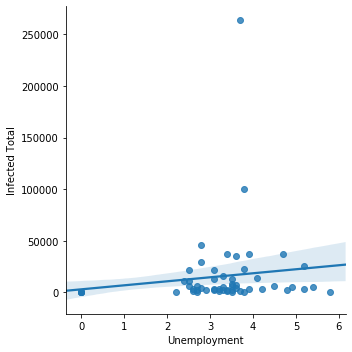

In [61]:
sn.lmplot(x="Unemployment", y="Infected Total", data=merged_corr)

In [62]:
df3.reset_index(inplace=True)

In [63]:
df3.head()

,Date,Primary_School,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women,Average Unemployment,Monthly Cases
0,Jan-2020,5.5,3.8,2.8,2.0,3.1,6.0,3.0,4.3,3.3,3.2,3.70,7.0
1,Feb-2020,5.7,3.6,3.0,1.9,3.1,5.8,2.5,4.4,3.3,3.1,3.64,70.0
2,Mar-2020,6.8,4.4,3.7,2.5,4.0,6.7,4.1,6.0,4.0,4.0,4.62,188049.0


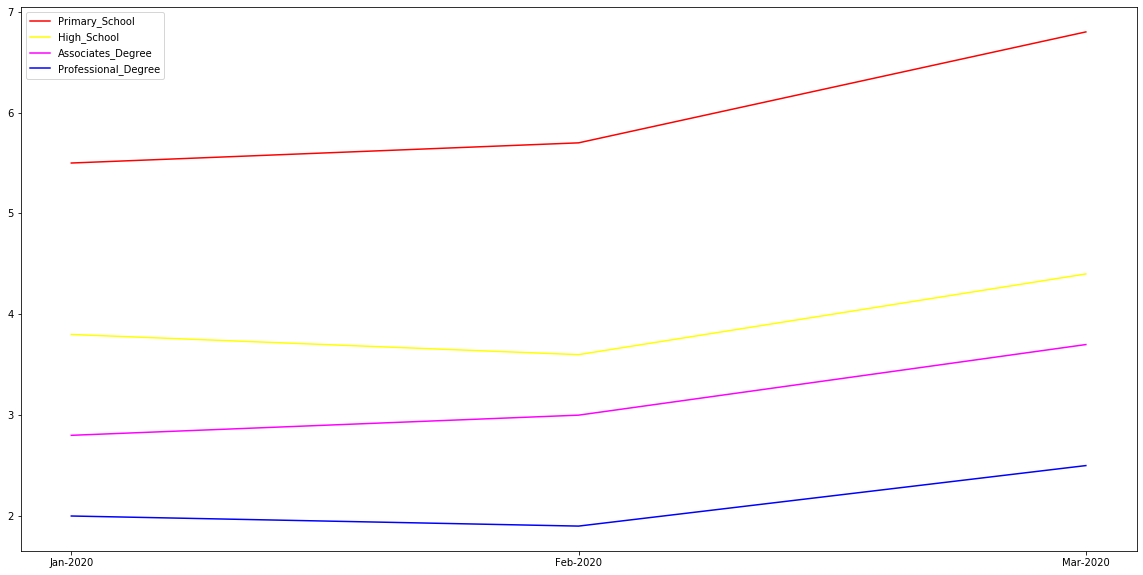

In [64]:
# Next, I will plot Unemployment monthly data from df3.
# We can see the trent of Unemployment is clearly increasing.
plt.figure(figsize=(20,10))
plt.plot( 'Date', 'Primary_School', data=df3, color='red')
plt.plot( 'Date', 'High_School', data=df3, color='yellow')
plt.plot( 'Date', 'Associates_Degree', data=df3, color='magenta')
plt.plot( 'Date', 'Professional_Degree', data=df3, color='blue')
plt.legend()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'White' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Second argument 'Black' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  This is separate from the ipykernel package so we can avoid doing imports until


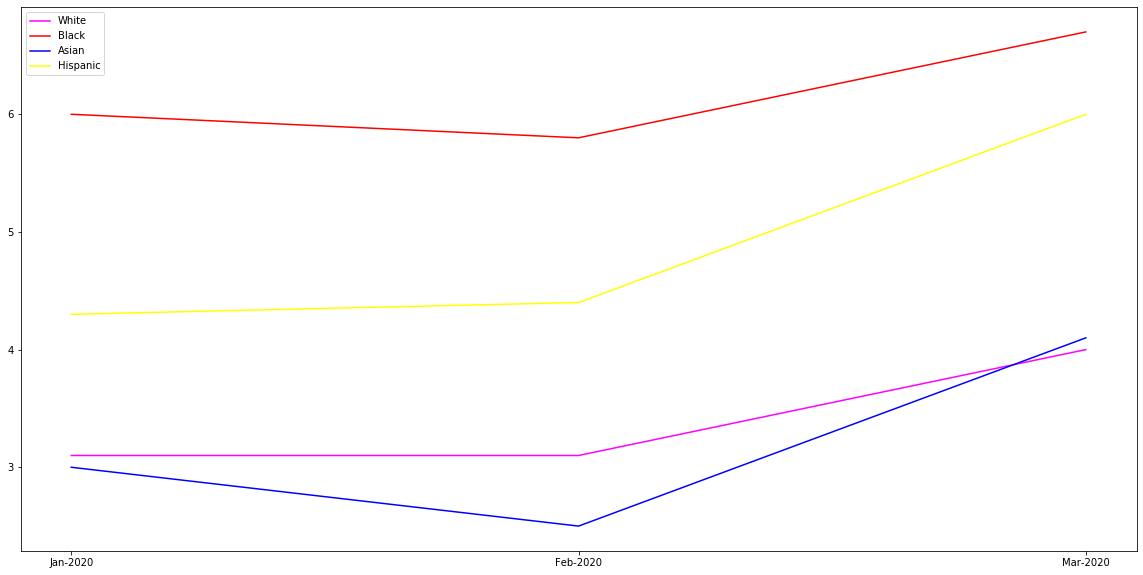

In [65]:
plt.figure(figsize=(20,10))
plt.plot( 'Date', 'White', data=df3, color='magenta')
plt.plot( 'Date', 'Black', data=df3, color='red')
plt.plot( 'Date', 'Asian', data=df3, color='blue')
plt.plot( 'Date', 'Hispanic', data=df3, color='yellow')
plt.legend()

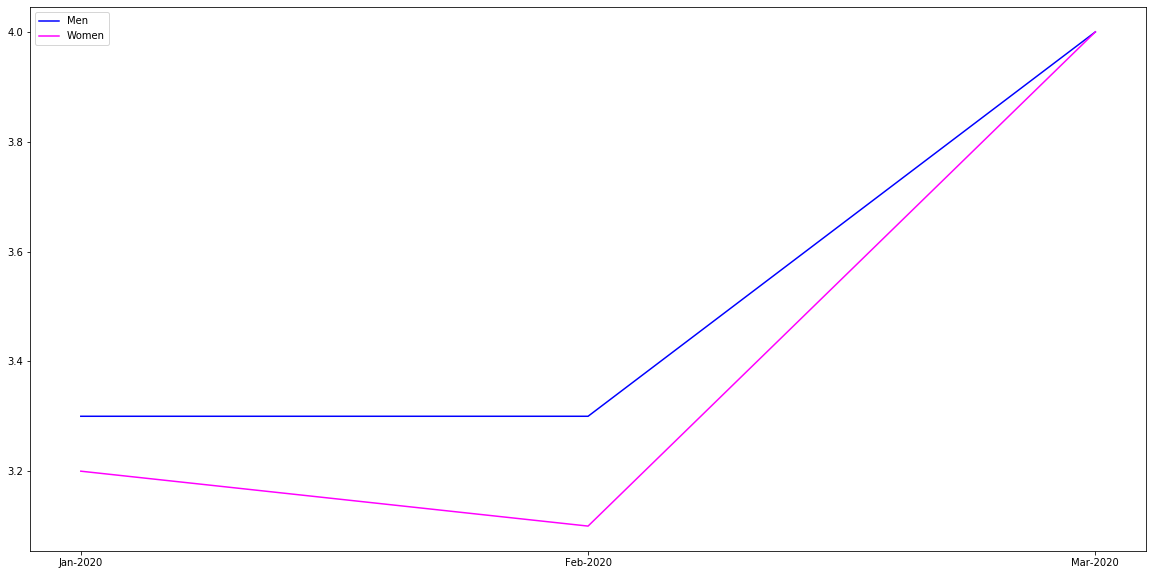

In [66]:
plt.figure(figsize=(20,10))
plt.plot( 'Date', 'Men', data=df3, color='blue')
plt.plot( 'Date', 'Women', data=df3, color='magenta')
plt.legend()

In [67]:
# Compute correlation between Monthly Cases and Average Unemployment.
# We can see such a high correlation.
df3["Monthly Cases"].corr(df3["Average Unemployment"])

0.9984916121798894

In [68]:
df3_corr=df3.corr()

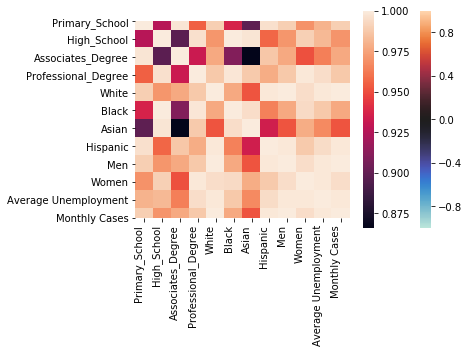

In [69]:
ax = sn.heatmap(df3_corr, vmin=-1, vmax=1, center=0, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
sn.heatmap(df3_corr, 
        xticklabels=df3_corr.columns,
        yticklabels=df3_corr.columns)

# Conclusion
### We have seen the correlation between Infected Total and Unemployment from the first part of this notebook. However, it is not enough to determine that the impact of COVID-19.

### Well it may seem to be due to COVID-19 and citywide lockdown from our analysis on data3. Since I don't have enough data at hand for monthly infected cases, this assumption will need further analysis. However, we do see that as montly cases increase unemployment increase.

### Finally, based on the overall analysis, there is a fair indication which suggests the impact of COVID-19 on the Unemployment but not concrete.